# Cat VS Non-Cat Classifier 

### Importing Required Libraries

In [29]:
import numpy as np               # For Numerical Computations
import matplotlib.pyplot as plt  # For Visualization
import h5py                      # Pythonic interface to the HDF5 binary data format
from PIL import Image
%matplotlib inline 
import seaborn as sns
# Keras Libraries
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.optimizers import SGD , RMSprop
from keras.layers.normalization import BatchNormalization

### Loading Dataset from h5py file format

In [30]:
# Load training data for classification
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

In [31]:
# Load test data for classification
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [36]:
print(f'Shape of our X_Train dataset is ; {train_set_x_orig.shape}')
print(f'Shape of our Y_Train dataset is ; {train_set_y_orig.shape}')

print(f'Shape of our X_TEST dataset is ; {test_set_x_orig.shape}')
print(f'Shape of our Y_TEST dataset is ; {test_set_y_orig.shape}')

Shape of our X_Train dataset is ; (209, 64, 64, 3)
Shape of our Y_Train dataset is ; (209,)
Shape of our X_TEST dataset is ; (50, 64, 64, 3)
Shape of our Y_TEST dataset is ; (50,)


### Reshaping Dataset for Classical ML Approach

In [37]:
# Reshape the train and test set labels incase we want to use classical ML Approach
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x_flatten.shape)
print(train_set_y.shape)
print(test_set_x_flatten.shape)
print(test_set_y.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [70]:
print(f' These are the keys/column present in our h5py file : \n {train_dataset.keys()}')

 These are the keys/column present in our h5py file : 
 <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [66]:
# Check all the classes and labels
classes = np.array(test_dataset["list_classes"][:])   # 1 for CAT and 0 for Non-Cat
classes = np.bincount(test_set_y_orig)
#print(f'Cat instances in Test Dataset are {classes[1]}')
print(f'Cat instances in Test Dataset are {np.count_nonzero(test_set_y_orig)}')
print(f'Non-Cat instances in Test Dataset are {classes[0]}')

print('***'*20)
classes = np.array(train_dataset["list_classes"][:])   # 1 for CAT and 0 for Non-Cat
classes = np.bincount(train_set_y_orig)
#print(f'Cat instances in Train Dataset are {classes[1]}')
print(f'Cat instances in Train Dataset are {np.count_nonzero(train_set_y_orig)}')
print(f'Non-Cat instances in Train Dataset are {classes[0]}')

Cat instances in Test Dataset are 33
Non-Cat instances in Test Dataset are 17
************************************************************
Cat instances in Train Dataset are 72
Non-Cat instances in Train Dataset are 137


### Visalizing Class Labels

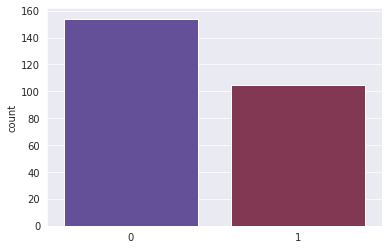

In [84]:
y_train=np.array(list(train_dataset['train_set_y']))
y_test=np.array(list(test_dataset['test_set_y']))
y_labels=np.concatenate( (y_train, y_test), axis=None)
sns.set_style('darkgrid')
sns.countplot(y_labels,palette='twilight')

### Visualize some Training & Testing data 

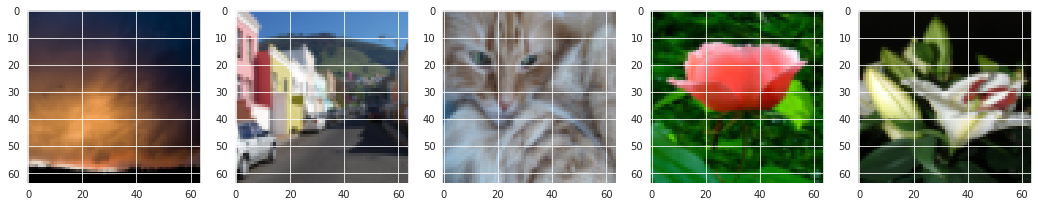

In [101]:
training_data_visual = list(train_dataset["train_set_x"])

plt.figure(figsize=(18,15)) 
for i in range(0,5):
    plt.subplot(1,5,i+1)    
    plt.imshow(training_data_visual[i])
plt.show()

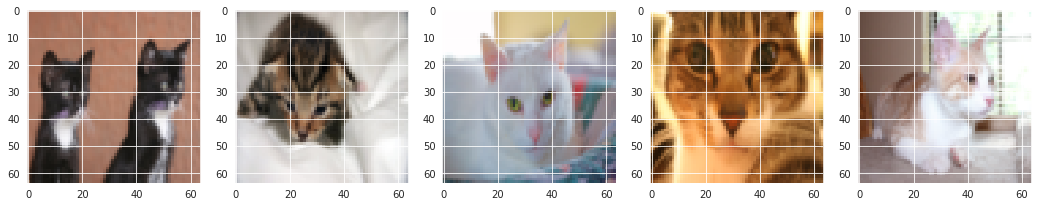

In [100]:
test_data_visual = list(test_dataset["test_set_x"])

plt.figure(figsize=(18,15)) 
for i in range(0,5):
    plt.subplot(1,5,i+1)    
    plt.imshow(test_data_visual[i])
plt.show()

# Model Building, Architecure and Training and Testing

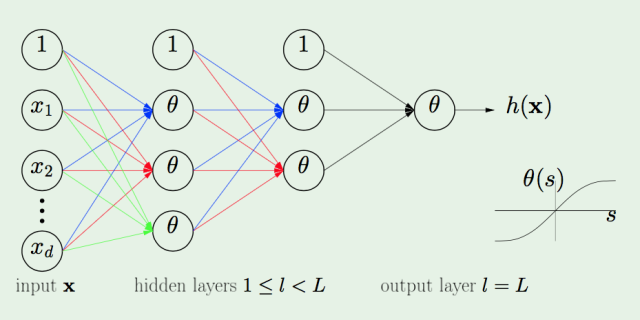

W0428 10:55:47.664581 140451896579904 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0428 10:55:47.687104 140451896579904 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0428 10:55:47.691091 140451896579904 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4048: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0428 10:55:47.720450 140451896579904 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:172: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instea

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18432     
_________________________________________________________________
batch_normalization_3 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________

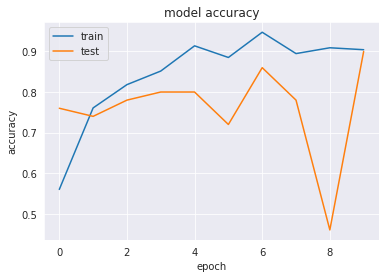

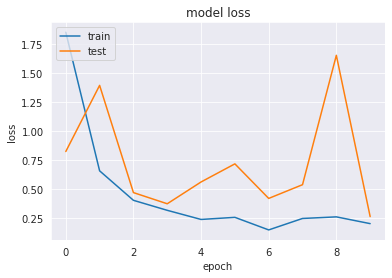

In [12]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(64,64,3),use_bias=False))   # Size of input image 
model2.add(BatchNormalization())  # To avoid co-variate shift
model2.add(MaxPooling2D((2,2)))   # Provides Invariance, reduces overfitting and dimensionality reduction 

model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), activation = 'relu',use_bias=False))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), activation = 'relu',use_bias=False))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), activation = 'relu',use_bias=False))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(512,activation='relu',use_bias=False))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

model2.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])

history = model2.fit(train_set_x_orig, train_set_y_orig,validation_data = (test_set_x_orig, test_set_y_orig),  
                     epochs=10, batch_size=16)


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Validation on Unseen Data

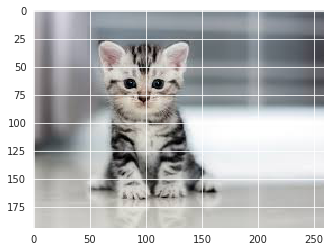

It's a CAT


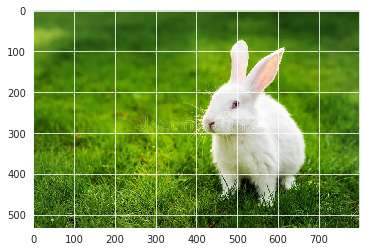

It's a Non-Cat


In [119]:
def predict_img(image_path):
    img = load_img(image_path)
    plt.imshow(img)
    plt.show()
    
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)                   # Converting Image to Array
    img_reshaped = img_array.reshape(1, 64, 64, 3)  # Reshaping into a required input with 3 channels RGB
    predictions = model2.predict(img_reshaped)
    final_pred=[int(round(p[0])) for p in predictions]  # If probablity score is > 0.5 classify it as 1 i.e Cat, Else Non-Cat

    for p in predictions:
        if int(round(p[0]))==1:
            print('It\'s a CAT')
        else:
            print('It\'s a Non-Cat') 
    
predict_img('download.jpeg')
predict_img('rabbit.jpg')